In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

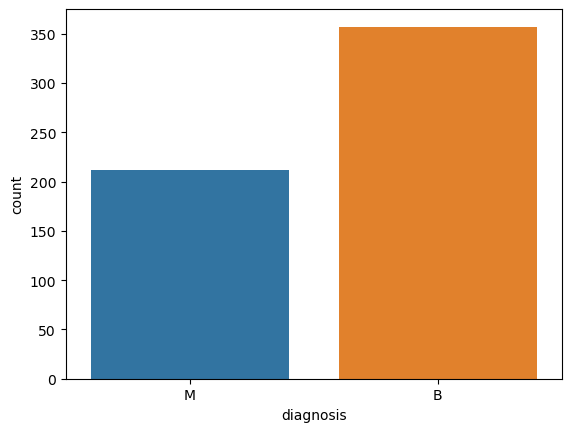

In [7]:
sns.countplot(x='diagnosis',data=df)

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

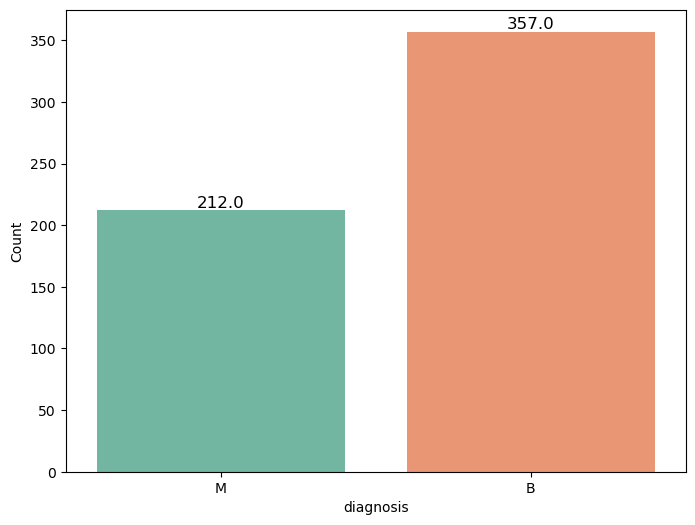

In [9]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
x = df.drop('diagnosis',axis=1)

In [11]:
y = df[['diagnosis']]

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=.30)

In [13]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [14]:
ytest.shape

(171, 1)

In [15]:
xtest.shape

(171, 30)

# Test and Validation

In [16]:
x_test, x_val, y_test, y_val = train_test_split(xtest, ytest, random_state=42, test_size=.50)
x_test.shape #15% of total data

(85, 30)

In [17]:
x_val.shape #15% of total data ; for hyper param tuning

(86, 30)

# Step 3: Decision Tree model and evaluation

In [18]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [19]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Decision Tree model performance

In [20]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.935672514619883 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest model and evaluation

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [22]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [23]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred_rf)) 


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [24]:
# Define hyperparameters for Decision Tree 
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12, 15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [25]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                              param_grid = dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 15, 20, 25,
                                       28],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [26]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00937796, 0.00258336, 0.00616903, ..., 0.00400152, 0.01001039,
        0.00599985]),
 'std_fit_time': array([2.84478006e-03, 1.77352691e-03, 3.97944718e-03, ...,
        4.90084422e-03, 2.68203841e-05, 4.89885804e-03]),
 'mean_score_time': array([0.00355697, 0.00189242, 0.00254025, ..., 0.00799999, 0.01000309,
        0.00598507]),
 'std_score_time': array([2.90465294e-03, 1.74296171e-03, 1.47216923e-03, ...,
        3.99999653e-03, 4.62310777e-06, 4.88687690e-03]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5,

In [27]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009378,0.002845,0.003557,0.002905,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
1,0.002583,0.001774,0.001892,0.001743,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,334
2,0.006169,0.003979,0.002540,0.001472,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
3,0.003776,0.003577,0.003941,0.002388,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9500,0.9000,0.9625,0.924051,0.949367,0.937184,0.022400,46
4,0.004863,0.005210,0.004127,0.003792,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.924051,0.912152,0.017321,1381


In [28]:
tuning_result_dt_gs.shape

(1980, 18)

In [29]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [30]:
tuning_result_dt_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1275,0.006013,0.004910,0.007999,0.003999,entropy,6,1,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9500,0.9375,0.949367,0.936709,0.942215,0.006108,1
1293,0.004001,0.004900,0.007999,0.004000,entropy,6,2,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9375,0.9500,0.949367,0.936709,0.942215,0.006108,1
1190,0.012134,0.003955,0.010000,0.000089,entropy,4,2,3,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1202,0.019983,0.000037,0.000000,0.000000,entropy,4,2,9,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1200,0.012308,0.003995,0.006022,0.004917,entropy,4,2,8,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3


# Perform Grid Search for Random Forest

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

# Evaluate the optimized models

In [31]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# Random Forest Grid Search
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


# Hyperparameter optimization using Randomized Search for Decision Tree

In [32]:
# Perform Randomized Search for Decision Tree 
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42) 
dt_random_search.fit(xtrain, ytrain) 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      15, 20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [33]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.01225333, 0.01035228, 0.00148554, 0.00483847, 0.02374482,
        0.00863152, 0.0123796 , 0.01123605, 0.00623555, 0.00600038,
        0.0100009 , 0.00800076, 0.00399933, 0.0039988 , 0.0099988 ,
        0.01548233, 0.01968632, 0.00702853, 0.01201315, 0.01101518,
        0.01200032, 0.01000018, 0.00601463, 0.00600357, 0.01003804,
        0.0060183 , 0.00400453, 0.00599294, 0.01200395, 0.01836977,
        0.00672359, 0.00827284, 0.00521693, 0.01612701, 0.00999999,
        0.00601959, 0.01400061, 0.00800047, 0.01597996, 0.01000795,
        0.0080792 , 0.01182299, 0.01765137, 0.0049623 , 0.00999708,
        0.01200476, 0.01867642, 0.01408482, 0.01199894, 0.00600119,
        0.01200099, 0.01709237, 0.0091002 , 0.00432596, 0.00960016,
        0.00799828, 0.01008954, 0.00598412, 0.0159986 , 0.01400266,
        0.01025171, 0.00600009, 0.004001  , 0.01399746, 0.00362134,
        0.0160584 , 0.00795841, 0.00799937, 0.01200294, 0.00603547,
        0.00600171, 0.00600038,

In [34]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012253,0.003551,0.005064,0.004141,best,5,5,8,entropy,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,25
1,0.010352,0.003202,0.006401,0.003202,best,3,4,None,gini,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.9125,0.9250,0.949367,0.924051,0.932184,0.014953,20
2,0.001486,0.002971,0.007666,0.001817,random,6,5,6,gini,"{'splitter': 'random', 'min_samples_split': 6,...",0.9250,0.8750,0.9500,0.936709,0.860759,0.909494,0.035176,83
3,0.004838,0.004011,0.009428,0.001979,random,5,4,15,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,33
4,0.023745,0.003011,0.005019,0.004215,best,3,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.9000,0.9500,0.936709,0.936709,0.934684,0.018332,6


In [35]:
dt_random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'entropy'}

# Perform Randomized Search for Random Forest

In [36]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'n_estimators': [101, 151, 201, 251,
                                                         301]},
                   random_state=42)

In [37]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.711411,0.040185,0.048035,0.007491,251,810,1,auto,None,gini,"{'n_estimators': 251, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
1,0.404906,0.046014,0.028099,0.004051,151,810,3,sqrt,4,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
2,0.749583,0.040815,0.043693,0.004495,201,4,1,log2,2,entropy,"{'n_estimators': 201, 'min_samples_split': 4, ...",0.9375,0.9375,0.9375,0.936709,0.924051,0.934652,0.005309,76
3,1.008103,0.049768,0.048801,0.006911,251,3,3,log2,20,gini,"{'n_estimators': 251, 'min_samples_split': 3, ...",0.9500,0.9500,0.9625,0.936709,0.949367,0.949715,0.008160,28
4,0.443966,0.029765,0.032534,0.003873,151,810,4,auto,2,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.534287,0.033529,0.031628,0.002045,151,4,1,log2,28,gini,"{'n_estimators': 151, 'min_samples_split': 4, ...",0.9375,0.9500,0.9625,0.936709,0.924051,0.942152,0.013073,74
96,0.733247,0.016046,0.040005,0.006321,201,3,2,log2,28,gini,"{'n_estimators': 201, 'min_samples_split': 3, ...",0.9375,0.9500,0.9625,0.936709,0.949367,0.947215,0.009495,44
97,0.756059,0.073488,0.053778,0.004605,301,810,1,sqrt,20,gini,"{'n_estimators': 301, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
98,0.833081,0.038209,0.040595,0.010772,201,7,2,auto,15,entropy,"{'n_estimators': 201, 'min_samples_split': 7, ...",0.9500,0.9500,0.9625,0.949367,0.949367,0.952247,0.005134,12


In [38]:
rf_random_search.best_params_

{'n_estimators': 201,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'gini'}

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [39]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.95      0.97       108
           M       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Random Forest Randomized Search

In [40]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Post Pruning for Decision Tree

In [41]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, random_state=42, splitter='random')

[Text(0.4431818181818182, 0.9444444444444444, 'concave points_mean <= 0.04\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.18181818181818182, 0.8333333333333334, 'radius_worst <= 17.727\nentropy = 0.248\nsamples = 218\nvalue = [209, 9]'),
 Text(0.13636363636363635, 0.7222222222222222, 'concave points_mean <= 0.02\nentropy = 0.161\nsamples = 213\nvalue = [208, 5]'),
 Text(0.09090909090909091, 0.6111111111111112, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.18181818181818182, 0.6111111111111112, 'radius_se <= 0.623\nentropy = 0.255\nsamples = 117\nvalue = [112, 5]'),
 Text(0.13636363636363635, 0.5, 'perimeter_mean <= 79.994\nentropy = 0.176\nsamples = 114\nvalue = [111, 3]'),
 Text(0.09090909090909091, 0.3888888888888889, 'entropy = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.18181818181818182, 0.3888888888888889, 'compactness_se <= 0.013\nentropy = 0.28\nsamples = 62\nvalue = [59, 3]'),
 Text(0.13636363636363635, 0.2777777777777778, 'concavity_worst <= 0.214

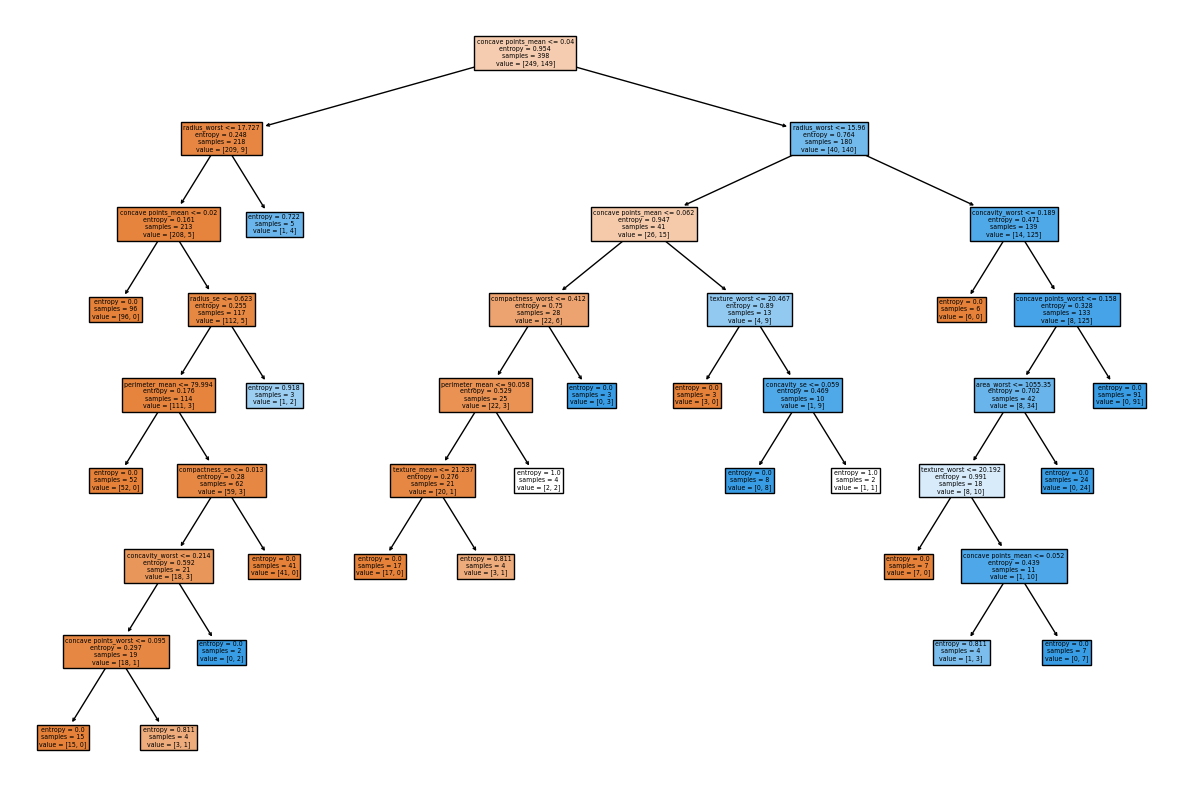

In [42]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

Read: #https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [43]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier  
ccp_alpha_values = pruning_path.ccp_alphas 

In [44]:
ccp_alpha_values 

array([0.        , 0.00399335, 0.00604739, 0.00641958, 0.00675868,
       0.00862793, 0.01202884, 0.01435018, 0.0173026 , 0.01763119,
       0.03099137, 0.03549229, 0.04094249, 0.05496803, 0.08343007,
       0.47242814])

In [45]:
clfs_list = []  # save models with diffrent ccp_alpha value
for ccp in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [46]:
clfs_list 

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.003993352659045518, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006047387516658223, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006419576589874848, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006758683256012092, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00862793379793314, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012028844403926979, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014350184435176862, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.017302601474775314, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01763119048807507, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.030991367208617764, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.03549229443392196, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.04094249107720667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.05496803084950469, random_state=42),
 

In [47]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ] 

In [48]:
train_scores

[1.0,
 0.992462311557789,
 0.9899497487437185,
 0.9874371859296482,
 0.9874371859296482,
 0.9824120603015075,
 0.9698492462311558,
 0.9698492462311558,
 0.9422110552763819,
 0.9422110552763819,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [49]:
test_scores

[0.9415204678362573,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9590643274853801,
 0.9298245614035088,
 0.9298245614035088,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [50]:
import matplotlib.pyplot as plt

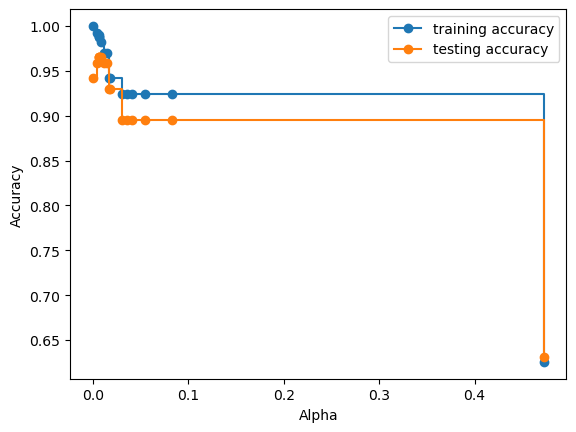

In [51]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [52]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [53]:
pred = clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

In [54]:
clf.score(xtrain, ytrain)

0.9824120603015075

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

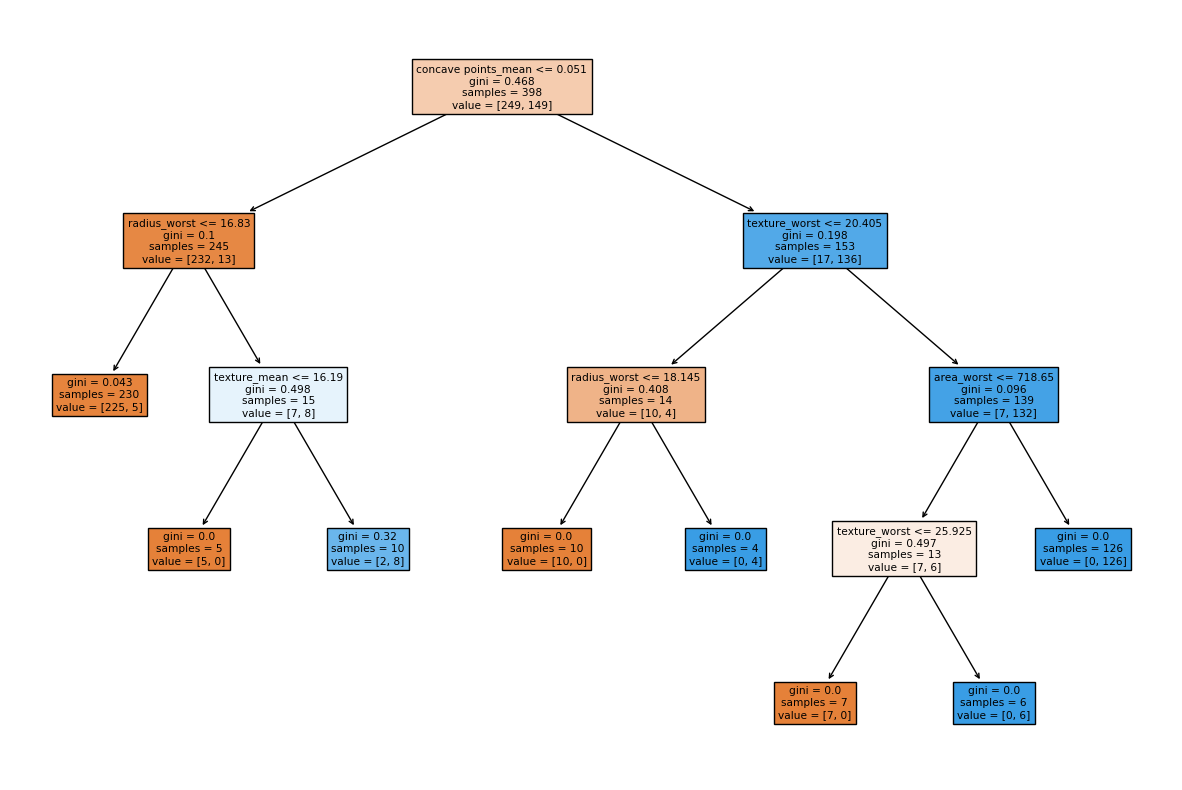

In [55]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# XGBOOST

In [56]:
# random & grid
# before performance & after performance

In [57]:
# xtrain, xtest, ytrain, ytest

In [58]:
#!pip install xgboost

In [59]:
from xgboost import XGBClassifier

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [62]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=.30,  stratify=y)

In [64]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(xtrain, ytrain)

y_pred_xgb = rf_model.predict(xtest)

y_pred_xgb = label_encoder.transform(y_pred_xgb)

In [65]:
print("XGB Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_xgb), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_xgb))

XGB Performance:
Accuracy: 0.9883040935672515 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [66]:
xgb_params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
    'max_depth': [2, 4, 6, 8, 10, 12, 14],
    'subsample': [0.6, 0.7, 0.8, 0.85],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.85]
}

<br>

## Grid Search

In [67]:
xgb_grid_search = GridSearchCV(estimator =xgb_model, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
xgb_grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.85],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'n_estimators': [50, 100, 150, 200, 250],
                         'subsample': [0.6, 0.7, 0.8, 0.85]},
             scoring='accuracy', verbose=2)

In [68]:
xgb_grid_search.cv_results_

{'mean_fit_time': array([0.06560311, 0.06678948, 0.06358972, ..., 0.24257116, 0.25223703,
        0.37571635]),
 'std_fit_time': array([0.00357065, 0.00374046, 0.00981749, ..., 0.04447201, 0.02187692,
        0.06082452]),
 'mean_score_time': array([0.01104913, 0.01058488, 0.01042204, ..., 0.01776395, 0.02641459,
        0.06141281]),
 'std_score_time': array([0.00220124, 0.00351532, 0.00602365, ..., 0.00193397, 0.00712433,
        0.05043879]),
 'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, ..., 0.85, 0.85, 0.85],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, ..., 0.25, 0.25, 0.25],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 14, 14, 14],
              mask=[False, False, False, ..., False, False, False],
      

In [69]:
tuning_result_xgb_gs = pd.DataFrame(xgb_grid_search.cv_results_)
tuning_result_xgb_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065603,0.003571,0.011049,0.002201,0.6,0.01,2,50,0.6,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.9250,0.9625,0.9000,0.898734,0.898734,0.916994,0.024862,2794
1,0.066789,0.003740,0.010585,0.003515,0.6,0.01,2,50,0.7,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.9250,0.9625,0.9000,0.898734,0.898734,0.916994,0.024862,2794
2,0.063590,0.009817,0.010422,0.006024,0.6,0.01,2,50,0.8,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.9250,0.9500,0.9000,0.911392,0.911392,0.919557,0.017159,2792
3,0.057349,0.007579,0.012161,0.004390,0.6,0.01,2,50,0.85,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.9500,0.9500,0.9000,0.898734,0.886076,0.916962,0.027411,2796
4,0.096634,0.009052,0.013900,0.004083,0.6,0.01,2,100,0.6,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.9625,0.9875,0.9375,0.936709,0.898734,0.944589,0.029588,2621


In [70]:
tuning_result_xgb_gs.shape

(2800, 18)

In [71]:
xgb_grid_search.best_params_

{'colsample_bytree': 0.85,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 0.85}

In [72]:
tuning_result_xgb_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2547,0.207360,0.010226,0.025918,0.004452,0.85,0.2,4,100,0.85,"{'colsample_bytree': 0.85, 'learning_rate': 0....",0.9875,1.0,0.9500,0.974684,0.924051,0.967247,0.027209,1
2714,0.347396,0.036057,0.032162,0.010091,0.85,0.25,6,200,0.8,"{'colsample_bytree': 0.85, 'learning_rate': 0....",0.9875,1.0,0.9625,0.974684,0.911392,0.967215,0.030596,2
1326,0.200545,0.015432,0.027625,0.002545,0.7,0.25,8,100,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.2...",0.9875,1.0,0.9625,0.974684,0.911392,0.967215,0.030596,2
2770,0.204077,0.020493,0.020992,0.001799,0.85,0.25,12,150,0.8,"{'colsample_bytree': 0.85, 'learning_rate': 0....",0.9875,1.0,0.9625,0.974684,0.911392,0.967215,0.030596,2
2710,0.336774,0.084526,0.026794,0.006206,0.85,0.25,6,150,0.8,"{'colsample_bytree': 0.85, 'learning_rate': 0....",0.9875,1.0,0.9625,0.974684,0.911392,0.967215,0.030596,2


In [75]:
y_pred_xgb_gs = xgb_grid_search.best_estimator_.predict(xtest)

#y_pred_xgb_gs = label_encoder.inverse_transform(y_pred_xgb_gs)

In [76]:
print("\n XGBoost Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_xgb_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_xgb_gs))


 XGBoost Grid Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<br>

## Random Search

In [77]:
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
xgb_random_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.85],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.25],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'subsample': [0.6, 0.7, 0.8, 0.85]},
                   random_state=42, scoring='accuracy', verbose=2)

In [78]:
xgb_random_search.cv_results_

{'mean_fit_time': array([0.32710567, 0.66842895, 0.27500372, 0.30755301, 0.33814073,
        0.62209716, 0.35576277, 0.28107948, 0.29526062, 0.401513  ,
        0.31396637, 0.36148829, 0.22613835, 0.32532711, 0.32233181,
        0.33635569, 0.32374339, 0.32882767, 0.19061923, 0.45707097,
        0.27408872, 0.73567309, 0.22119045, 0.23322206, 0.14104476,
        0.2680028 , 0.4614965 , 0.69887333, 0.25717945, 0.19678459,
        0.23360276, 0.31957207, 0.24490781, 0.21138511, 0.41966767,
        0.31108255, 0.4540463 , 0.22749062, 0.24979372, 0.23831182,
        0.27523298, 0.6759912 , 0.25397768, 0.32132363, 0.33037744,
        0.28230042, 0.49211183, 0.47726197, 0.31206703, 0.29964476]),
 'std_fit_time': array([0.06034267, 0.04577842, 0.0307089 , 0.03572365, 0.01105339,
        0.03765259, 0.03687607, 0.04940367, 0.03834334, 0.03213954,
        0.03575891, 0.01432591, 0.01972551, 0.01337173, 0.02361008,
        0.02610625, 0.01726178, 0.02212179, 0.01782044, 0.02053712,
        0.026

In [79]:
tuning_result_xgb_rs = pd.DataFrame(xgb_random_search.cv_results_)
tuning_result_xgb_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.327106,0.060343,0.025232,0.002968,0.6,150,12,0.1,0.7,"{'subsample': 0.6, 'n_estimators': 150, 'max_d...",1.0000,0.9875,0.95,0.974684,0.911392,0.964715,0.031380,2
1,0.668429,0.045778,0.029023,0.005196,0.6,200,8,0.01,0.7,"{'subsample': 0.6, 'n_estimators': 200, 'max_d...",0.9750,0.9875,0.95,0.949367,0.886076,0.949589,0.034977,39
2,0.275004,0.030709,0.030148,0.011521,0.7,50,8,0.01,0.85,"{'subsample': 0.7, 'n_estimators': 50, 'max_de...",0.9375,0.9625,0.90,0.936709,0.911392,0.929620,0.021923,48
3,0.307553,0.035724,0.023071,0.001504,0.6,200,8,0.2,0.7,"{'subsample': 0.6, 'n_estimators': 200, 'max_d...",1.0000,0.9875,0.95,0.962025,0.911392,0.962184,0.030981,10
4,0.338141,0.011053,0.028874,0.004689,0.6,250,10,0.2,0.8,"{'subsample': 0.6, 'n_estimators': 250, 'max_d...",0.9875,0.9875,0.95,0.949367,0.911392,0.957152,0.028452,28


In [80]:
tuning_result_xgb_rs.shape

(50, 18)

In [81]:
xgb_random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 14,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [82]:
tuning_result_xgb_rs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.401513,0.032140,0.022124,0.001331,0.8,200,14,0.1,0.7,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.9875,0.9875,0.9500,0.974684,0.924051,0.964747,0.024527,1
0,0.327106,0.060343,0.025232,0.002968,0.6,150,12,0.1,0.7,"{'subsample': 0.6, 'n_estimators': 150, 'max_d...",1.0000,0.9875,0.9500,0.974684,0.911392,0.964715,0.031380,2
20,0.274089,0.026939,0.026246,0.003222,0.8,150,12,0.25,0.7,"{'subsample': 0.8, 'n_estimators': 150, 'max_d...",0.9750,1.0000,0.9625,0.974684,0.911392,0.964715,0.029320,2
17,0.328828,0.022122,0.024685,0.003831,0.7,200,12,0.2,0.85,"{'subsample': 0.7, 'n_estimators': 200, 'max_d...",0.9875,0.9875,0.9625,0.974684,0.911392,0.964715,0.028234,2
45,0.282300,0.042381,0.025378,0.004165,0.6,200,2,0.25,0.6,"{'subsample': 0.6, 'n_estimators': 200, 'max_d...",1.0000,0.9875,0.9250,0.974684,0.924051,0.962247,0.031824,5


In [84]:
y_pred_xgb_rs = xgb_random_search.best_estimator_.predict(xtest)

#y_pred_xgb_rs = label_encoder.inverse_transform(y_pred_xgb_rs)

In [85]:
print("\n XGBoost Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_xgb_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_xgb_rs))


 XGBoost Randomized Search Performance:
Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



 <br>

<br>

# ADA BOOST

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
df['diagnosis'] = label_encoder.inverse_transform(df['diagnosis'])

In [88]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.30, stratify=y)

In [90]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [91]:
y_pred_ada = ada_model.predict(xtest)

In [92]:
print("ADA Boost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_ada), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_ada))

ADA Boost Performance:
Accuracy: 0.9824561403508771 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99       107
           M       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [93]:
base_estimator = DecisionTreeClassifier()

In [94]:
ada_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': [2,4,6,8,10,12,14],
    'base_estimator__min_samples_split': [2, 5, 10, 15, 20, 25, 30]
}

<br>

# Grid Search

In [95]:
ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=base_estimator, random_state=42), param_grid=ada_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
ada_grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'base_estimator__min_samples_split': [2, 5, 10, 15, 20,
                                                               25, 30],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [96]:
ada_grid_search.cv_results_

{'mean_fit_time': array([0.62926507, 1.27349329, 2.06716809, ..., 1.27633986, 1.76271257,
        1.94486394]),
 'std_fit_time': array([0.049544  , 0.09053739, 0.21047398, ..., 0.3306107 , 0.61286761,
        0.78969217]),
 'mean_score_time': array([0.01902547, 0.03063169, 0.04565148, ..., 0.02131639, 0.02756448,
        0.01926975]),
 'std_score_time': array([0.00281283, 0.00280344, 0.00302421, ..., 0.00575   , 0.00809854,
        0.00485582]),
 'param_algorithm': masked_array(data=['SAMME', 'SAMME', 'SAMME', ..., 'SAMME.R', 'SAMME.R',
                    'SAMME.R'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_base_estimator__max_depth': masked_array(data=[2, 2, 2, ..., 14, 14, 14],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_base_estimator__min_samples_split': masked_array(data=[2, 2, 2, ..., 30, 30, 30],
             

In [97]:
tuning_result_ada_gs = pd.DataFrame(ada_grid_search.cv_results_)
tuning_result_ada_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator__max_depth,param_base_estimator__min_samples_split,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.629265,0.049544,0.019025,0.002813,SAMME,2,2,0.01,50,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.9750,0.9875,0.9125,0.936709,0.886076,0.939557,0.037829,1067
1,1.273493,0.090537,0.030632,0.002803,SAMME,2,2,0.01,100,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.9625,0.9875,0.9250,0.936709,0.873418,0.937025,0.038438,1144
2,2.067168,0.210474,0.045651,0.003024,SAMME,2,2,0.01,150,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.9750,0.9875,0.9375,0.936709,0.873418,0.942025,0.039777,986
3,2.698447,0.127274,0.058834,0.003310,SAMME,2,2,0.01,200,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.9750,0.9750,0.9375,0.936709,0.873418,0.939525,0.037146,1088
4,0.719949,0.038697,0.020751,0.005937,SAMME,2,2,0.05,50,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.9750,0.9750,0.9625,0.924051,0.873418,0.941994,0.039049,1015


In [98]:
tuning_result_ada_gs.shape

(1568, 18)

In [99]:
ada_grid_search.best_params_

{'algorithm': 'SAMME',
 'base_estimator__max_depth': 8,
 'base_estimator__min_samples_split': 30,
 'learning_rate': 0.2,
 'n_estimators': 150}

In [100]:
tuning_result_ada_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator__max_depth,param_base_estimator__min_samples_split,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
670,1.545132,0.629621,0.021021,0.008269,SAMME,12,30,0.2,150,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.975,0.9875,0.975,0.987342,0.911392,0.967247,0.028474,1
782,1.517789,0.617988,0.021886,0.008474,SAMME,14,30,0.2,150,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.975,0.9875,0.975,0.987342,0.911392,0.967247,0.028474,1
558,1.518585,0.626568,0.021468,0.010924,SAMME,10,30,0.2,150,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.975,0.9875,0.975,0.987342,0.911392,0.967247,0.028474,1
446,1.518779,0.624130,0.023770,0.009417,SAMME,8,30,0.2,150,"{'algorithm': 'SAMME', 'base_estimator__max_de...",0.975,0.9875,0.975,0.987342,0.911392,0.967247,0.028474,1
1499,0.323110,0.166797,0.007943,0.004520,SAMME.R,14,10,0.1,200,"{'algorithm': 'SAMME.R', 'base_estimator__max_...",0.975,0.9875,0.950,0.987342,0.924051,0.964778,0.024523,5


In [101]:
y_pred_ada_gs = ada_grid_search.best_estimator_.predict(xtest)

In [102]:
print("\Ada Boost Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_ada_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_ada_gs))

\Ada Boost Grid Search Performance:
Accuracy: 0.9766081871345029
Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       107
           M       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Random Search

In [103]:
ada_random_search = RandomizedSearchCV(estimator=AdaBoostClassifier(base_estimator=base_estimator, random_state=42), param_distributions=ada_params, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
ada_random_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator__max_depth': [2, 4, 6,
                                                                      8, 10, 12,
                                                                      14],
                                        'base_estimator__min_samples_split': [2,
                                                                              5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              25,
                                                                              30],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [104]:
ada_random_search.cv_results_

{'mean_fit_time': array([0.41474071, 1.6933116 , 0.45438042, 1.28585582, 0.41961184,
        0.16157346, 0.95646009, 0.42935195, 0.94207106, 0.0136682 ,
        0.54646745, 1.39358912, 1.05639014, 1.12396765, 1.26818581,
        0.4834425 , 0.83699236, 0.28135066, 0.31569152, 1.50707202,
        0.80645509, 0.85118461, 0.95264311, 0.53414574, 0.92241411,
        1.23717785, 1.72898831, 0.38094888, 0.19187698, 1.10907426,
        1.40294299, 2.31577673, 2.50611391, 0.68501983, 0.72994614,
        0.7741673 , 1.90435939, 0.57537928, 0.03222532, 1.77425175,
        1.87996817, 1.24994483, 0.2754468 , 1.58450089, 2.40848265,
        0.63926129, 0.58123059, 0.38916645, 0.39580183, 0.11364889]),
 'std_fit_time': array([0.2034074 , 0.03655036, 0.01900559, 0.01701728, 0.00802591,
        0.05905146, 0.69121833, 0.01049266, 0.02848379, 0.00335655,
        0.00335837, 0.31845445, 0.02097214, 0.51539235, 0.01480508,
        0.24693441, 0.01668687, 0.20018269, 0.19251207, 0.46236393,
        0.016

In [105]:
tuning_result_ada_rs = pd.DataFrame(ada_random_search.cv_results_)
tuning_result_ada_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_base_estimator__min_samples_split,param_base_estimator__max_depth,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.414741,0.203407,0.007319,0.002250,200,0.2,20,14,SAMME.R,"{'n_estimators': 200, 'learning_rate': 0.2, 'b...",0.9250,0.9750,0.9250,0.962025,0.898734,0.937152,0.027649,42
1,1.693312,0.036550,0.026985,0.003118,200,0.05,25,4,SAMME.R,"{'n_estimators': 200, 'learning_rate': 0.05, '...",0.9375,0.9500,0.9375,0.949367,0.936709,0.942215,0.006108,31
2,0.454380,0.019006,0.010071,0.002778,50,0.01,30,8,SAMME,"{'n_estimators': 50, 'learning_rate': 0.01, 'b...",0.9625,0.9875,0.9125,0.924051,0.911392,0.939589,0.030301,41
3,1.285856,0.017017,0.022992,0.002625,150,0.01,20,4,SAMME.R,"{'n_estimators': 150, 'learning_rate': 0.01, '...",0.9625,1.0000,0.9375,0.949367,0.886076,0.947089,0.037032,22
4,0.419612,0.008026,0.008237,0.002722,50,0.01,25,4,SAMME.R,"{'n_estimators': 50, 'learning_rate': 0.01, 'b...",0.9625,1.0000,0.9375,0.924051,0.886076,0.942025,0.038090,37


In [106]:
tuning_result_ada_rs.shape

(50, 18)

In [107]:
ada_random_search.best_params_

{'n_estimators': 50,
 'learning_rate': 0.2,
 'base_estimator__min_samples_split': 30,
 'base_estimator__max_depth': 6,
 'algorithm': 'SAMME'}

In [108]:
tuning_result_ada_rs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_base_estimator__min_samples_split,param_base_estimator__max_depth,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
37,0.575379,0.137404,0.009158,0.002958,50,0.2,30,6,SAMME,"{'n_estimators': 50, 'learning_rate': 0.2, 'ba...",0.9750,0.9875,0.9750,0.974684,0.911392,0.964715,0.027105,1
39,1.774252,0.035662,0.030797,0.004415,150,0.05,25,4,SAMME,"{'n_estimators': 150, 'learning_rate': 0.05, '...",0.9750,0.9875,0.9625,0.974684,0.911392,0.962215,0.026613,2
23,0.534146,0.005547,0.013735,0.002347,100,0.2,5,2,SAMME,"{'n_estimators': 100, 'learning_rate': 0.2, 'b...",0.9875,0.9875,0.9625,0.974684,0.898734,0.962184,0.033058,3
32,2.506114,0.223690,0.036060,0.005375,200,0.01,25,14,SAMME,"{'n_estimators': 200, 'learning_rate': 0.01, '...",0.9625,0.9875,0.9625,0.974684,0.911392,0.959715,0.025871,4
46,0.581231,0.011759,0.014776,0.001726,50,0.2,30,4,SAMME,"{'n_estimators': 50, 'learning_rate': 0.2, 'ba...",0.9625,0.9750,0.9625,0.974684,0.911392,0.957215,0.023567,5


In [109]:
y_pred_ada_rs = ada_random_search.best_estimator_.predict(xtest)

In [110]:
print("\n Ada Boost Ramdomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_ada_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_ada_rs))


 Ada Boost Ramdomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       107
           M       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# CatBoost

In [111]:
!pip install catboost

In [112]:
from catboost import CatBoostClassifier

In [113]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(xtrain, ytrain)

In [114]:
y_pred_cat = cat_model.predict(xtest)

In [116]:
print("Cat Boost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_cat), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_cat))

Cat Boost Performance:
Accuracy: 0.9766081871345029 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       107
           M       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [117]:
cat_params = {
    'iterations': [100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [2, 4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

<br>

# Grid Search

In [118]:
cat_grid_search = GridSearchCV(estimator=cat_model, param_grid=cat_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

cat_grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020553A4A090>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8, 10],
                         'iterations': [100, 150, 200, 250, 300],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2]},
             scoring='accuracy', verbose=2)

In [119]:
cat_grid_search.cv_results_

{'mean_fit_time': array([  0.60454025,   0.56158342,   0.50483832,   0.46915789,
          0.46516523,   0.46587443,   0.44399014,   0.48426738,
          0.44996629,   0.46444902,   0.41399193,   0.39249372,
          0.54193697,   0.40585098,   0.4912703 ,   0.51127872,
          1.43680081,   0.37944703,   0.35775604,   0.41063414,
          0.5576993 ,   0.5631609 ,   0.53569522,   0.52850623,
          0.57305026,   0.56042695,   0.57312713,   0.55423875,
          0.5818572 ,   0.5935308 ,   0.59206419,   0.6498662 ,
          0.66119356,   0.63378658,   0.6724546 ,   0.65532794,
          0.66180301,   0.67889781,   0.6279336 ,   0.67635918,
          0.90098925,   1.08918481,   1.28370538,   1.31520119,
          1.29560947,   1.30044022,   1.2801065 ,   1.25927224,
          1.25862589,   1.26083097,   1.27035985,   1.26068945,
          1.25369778,   1.10702825,   1.35234985,   1.23517709,
          1.13951125,   1.14747863,   1.25283427,   1.25849209,
          1.42499766,  

In [120]:
tuning_result_cat_gs = pd.DataFrame(cat_grid_search.cv_results_)
tuning_result_cat_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.604540,0.035071,0.004022,0.002708,2,100,1,0.01,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",0.9625,0.9875,0.9375,0.936709,0.886076,0.942057,0.033664,500
1,0.561583,0.063219,0.003637,0.001491,2,100,1,0.05,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",0.9750,0.9875,0.9625,0.987342,0.924051,0.967278,0.023506,2
2,0.504838,0.026621,0.003567,0.001875,2,100,1,0.1,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",0.9750,0.9875,0.9375,0.962025,0.911392,0.954684,0.027251,453
3,0.469158,0.041625,0.004999,0.001365,2,100,1,0.2,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",0.9750,0.9875,0.9375,0.974684,0.911392,0.957215,0.028380,363
4,0.465165,0.019615,0.002334,0.001679,2,100,3,0.01,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",0.9625,0.9875,0.9375,0.936709,0.911392,0.947120,0.025863,493


In [121]:
tuning_result_cat_gs.shape

(500, 17)

In [122]:
cat_grid_search.best_params_

{'depth': 2, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

In [123]:
tuning_result_cat_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,1.089185,0.065614,0.006064,0.003684,2,200,1,0.05,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",0.9875,1.0000,0.9625,0.974684,0.924051,0.969747,0.026059,1
1,0.561583,0.063219,0.003637,0.001491,2,100,1,0.05,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",0.9750,0.9875,0.9625,0.987342,0.924051,0.967278,0.023506,2
188,3.587698,0.057309,0.005589,0.000923,4,300,5,0.01,"{'depth': 4, 'iterations': 300, 'l2_leaf_reg':...",0.9875,0.9875,0.9625,0.987342,0.911392,0.967247,0.029551,3
206,3.078799,0.091868,0.004763,0.002633,6,100,3,0.1,"{'depth': 6, 'iterations': 100, 'l2_leaf_reg':...",0.9875,0.9875,0.9625,0.974684,0.924051,0.967247,0.023512,3
327,23.121533,2.028566,0.007045,0.003704,8,150,3,0.2,"{'depth': 8, 'iterations': 150, 'l2_leaf_reg':...",0.9875,0.9875,0.9625,0.987342,0.911392,0.967247,0.029551,3


In [124]:
y_pred_cat_gs = cat_grid_search.best_estimator_.predict(xtest)

In [125]:
print("\Cat Boost Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_cat_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_cat_gs))

\Cat Boost Grid Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       107
           M       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<br>

# Random Search

In [127]:
cat_random_search = RandomizedSearchCV(estimator=cat_model, param_distributions=cat_params, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

cat_random_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000020553A4A090>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'depth': [2, 4, 6, 8, 10],
                                        'iterations': [100, 150, 200, 250, 300],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [128]:
cat_random_search.cv_results_

{'mean_fit_time': array([ 22.51648774,   2.2160676 ,  15.57410212,   2.32203197,
          1.16306729,  24.38189454,  23.60461001,   2.78454952,
          2.07536087,  71.3171175 ,   1.38641086,   7.0395102 ,
         34.67656541,   2.94340906,  25.28602514,  34.23746967,
        108.31579828,   1.71208787,  14.71066694,  41.39499445,
        123.99536633, 111.61331372,  17.7065392 ,  23.91566601,
          2.32199779, 102.15911818, 113.574018  ,   6.35985928,
          2.63525386,  22.54939342,  98.11592803,  24.21252213,
         75.44411545,   6.65048056,   1.59405808,  23.58564749,
         33.13909831,   2.90996346,   6.63439054,   2.86707077,
         37.59467187,   2.72255034, 106.44066725,   7.63254871,
          1.93947482,   2.71598086,   1.31836891,   1.49698763,
         38.38430238,   2.22030482]),
 'std_fit_time': array([7.78663508, 0.56673126, 1.06039056, 0.17757157, 0.08064962,
        0.47570372, 3.10207406, 0.1014    , 0.16986973, 0.9060217 ,
        0.10340756, 0.353

In [129]:
tuning_result_cat_rs = pd.DataFrame(cat_random_search.cv_results_)
tuning_result_cat_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_l2_leaf_reg,param_iterations,param_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.516488,7.786635,0.006921,0.006238,0.05,1,250,8,"{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'ite...",0.9875,0.9875,0.9500,0.974684,0.911392,0.962215,0.028866,9
1,2.216068,0.566731,0.024538,0.040795,0.05,7,250,2,"{'learning_rate': 0.05, 'l2_leaf_reg': 7, 'ite...",0.9875,0.9875,0.9500,0.974684,0.898734,0.959684,0.033410,27
2,15.574102,1.060391,0.002324,0.002450,0.1,7,250,8,"{'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iter...",0.9875,0.9875,0.9500,0.974684,0.911392,0.962215,0.028866,9
3,2.322032,0.177572,0.001096,0.000797,0.2,7,200,4,"{'learning_rate': 0.2, 'l2_leaf_reg': 7, 'iter...",0.9875,1.0000,0.9375,0.974684,0.898734,0.959684,0.036962,27
4,1.163067,0.080650,0.004136,0.003533,0.01,3,100,4,"{'learning_rate': 0.01, 'l2_leaf_reg': 3, 'ite...",0.9750,0.9875,0.9500,0.962025,0.898734,0.954652,0.030646,47


In [130]:
tuning_result_cat_rs.shape

(50, 17)

In [131]:
cat_random_search.best_params_

{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 4}

In [132]:
tuning_result_cat_rs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_l2_leaf_reg,param_iterations,param_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,2.635254,0.138546,0.003543,0.002450,0.05,1,100,4,"{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'ite...",0.9875,0.9875,0.9625,0.987342,0.911392,0.967247,0.029551,1
21,111.613314,8.464771,0.004524,0.004593,0.2,5,300,10,"{'learning_rate': 0.2, 'l2_leaf_reg': 5, 'iter...",0.9750,0.9875,0.9500,1.000000,0.911392,0.964778,0.031400,2
48,38.384302,8.240521,0.011600,0.014844,0.2,7,100,10,"{'learning_rate': 0.2, 'l2_leaf_reg': 7, 'iter...",0.9750,0.9875,0.9625,0.987342,0.911392,0.964747,0.028232,3
35,23.585647,0.952650,0.006568,0.007605,0.05,7,150,8,"{'learning_rate': 0.05, 'l2_leaf_reg': 7, 'ite...",0.9875,0.9875,0.9625,0.974684,0.911392,0.964715,0.028234,4
38,6.634391,0.526277,0.003374,0.002824,0.05,5,100,6,"{'learning_rate': 0.05, 'l2_leaf_reg': 5, 'ite...",0.9875,0.9875,0.9625,0.974684,0.911392,0.964715,0.028234,4


In [133]:
y_pred_cat_rs = cat_random_search.best_estimator_.predict(xtest)

In [134]:
print("\Cat Boost Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_cat_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_cat_rs))

\Cat Boost Randomized Search Performance:
Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97       107
           M       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

